## Exploratory Analysis of Deep Blue's Crawl

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [89]:
# Load crawl CSV
deep_blue_crawl_df = pd.read_csv("../data/deep_blue_xtract_crawl.csv")

,full_path,size_bytes,extension,label,file_uuid
2,/UMich/download/DeepBlueData_05741r808/run_msi...,10500421443,gz,compressed,ebfb8c02_run_msis_Jan_2010_USR_files_data.tar.gz
3,/UMich/download/DeepBlueData_05741r808/run_msi...,116713949474,gz,compressed,f2ee854d_run_msis_Jan_2010_data.tar.gz
4,/UMich/download/DeepBlueData_05741r808/run_msi...,116749943494,gz,compressed,8b4ee364_run_msis_June_2010_data.tar.gz
5,/UMich/download/DeepBlueData_05741r808/run_wac...,10497636512,gz,compressed,032c4a0d_run_waccm_Jan_2010_USR_files_data.tar.gz
6,/UMich/download/DeepBlueData_05741r808/run_wac...,110299128465,gz,compressed,f14b9817_run_waccm_Jan_2010_data.tar.gz
7,/UMich/download/DeepBlueData_05741r808/run_wac...,111724951078,gz,compressed,4c89ac68_run_waccm_June_2010_data.tar.gz
9,/UMich/download/DeepBlueData_05741r808/waccm_l...,405275167,gz,compressed,4fedc68e_waccm_lower_boundary_files_data.tar.gz
554,/UMich/download/DeepBlueData_1c18dg64h/candida...,129983873,gz,compressed,88bf4e71_candidate_stability_project.tar.gz
555,/UMich/download/DeepBlueData_1c18dg64h/candida...,872921780,gz,compressed,0a8c7b17_candidate_stability_workspace.tar.gz
556,/UMich/download/DeepBlueData_1c18dg64h/rigid_p...,85926797,gz,compressed,555317a5_rigid_protein_project.tar.gz


In [4]:
# Get compressed extensions
compressed_extensions = set(deep_blue_crawl_df[deep_blue_crawl_df.label == "compressed"].extension)

In [5]:
# Get data on file size of each extension
for extension in compressed_extensions:
    print(f"{extension}: ")
    print(deep_blue_crawl_df[deep_blue_crawl_df.extension == extension].describe())

tar: 
         size_bytes
count  1.600000e+01
mean   4.482301e+09
std    8.152891e+09
min    2.910800e+04
25%    4.274491e+08
50%    1.001690e+09
75%    1.453554e+09
max    2.102018e+10
gz: 
         size_bytes
count  3.300000e+01
mean   2.128045e+10
std    3.965044e+10
min    1.806800e+04
25%    3.972696e+07
50%    9.708754e+08
75%    1.050042e+10
max    1.167499e+11
zip: 
         size_bytes
count  8.240000e+02
mean   3.516081e+09
std    2.539581e+10
min    4.451000e+03
25%    5.159525e+06
50%    2.541659e+07
75%    1.542360e+08
max    4.280410e+11


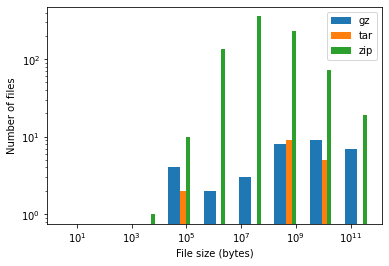

In [6]:
# Split the file size data by extension
gz_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "gz"].size_bytes.values
tar_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "tar"].size_bytes.values
zip_data = deep_blue_crawl_df[deep_blue_crawl_df.extension == "zip"].size_bytes.values

# Create bins in logspace
bins = np.logspace(0,np.log10(max(deep_blue_crawl_df[deep_blue_crawl_df.label == "compressed"].size_bytes.values)), 10)

# Plot the data
plt.hist([gz_data, tar_data, zip_data], label=["gz", "tar", "zip"], bins=bins)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("File size (bytes)")
plt.ylabel("Number of files")
plt.legend(loc="upper right")

## Exploratory Analysis of MDF's Crawl

In [62]:
mdf_crawl_df = pd.read_csv("/Users/ryan/Documents/CS/abyss/data/mdf_crawl.csv")

In [63]:
mdf_crawl_df[mdf_crawl_df.full_]

,full_path,size_bytes,extension,label,file_uuid
0,/MDF/mdf_connect/prod/data/ab_initio_solute_da...,411,NaN,decompressed,75f16d61_PRE_script_output
1,/MDF/mdf_connect/prod/data/ab_initio_solute_da...,234,NaN,decompressed,4668a291_PCDAT
2,/MDF/mdf_connect/prod/data/ab_initio_solute_da...,527172,xml,decompressed,2826a3fa_vasprun.xml
3,/MDF/mdf_connect/prod/data/ab_initio_solute_da...,713,NaN,decompressed,6a90c9a9_error
4,/MDF/mdf_connect/prod/data/ab_initio_solute_da...,514963,xml,decompressed,07cc89ff_vasprun.xml
...,...,...,...,...,...
2332773,/MDF/mdf_connect/prod/data/data_for_motif_extr...,674,xyz,decompressed,d8445ec8_3015.xyz
2332774,/MDF/mdf_connect/prod/data/data_for_motif_extr...,712,xyz,decompressed,56b9f469_3432.xyz
2332775,/MDF/mdf_connect/prod/data/data_for_motif_extr...,806,xyz,decompressed,2563a19c_3511.xyz
2332776,/MDF/mdf_connect/prod/data/data_for_motif_extr...,769,xyz,decompressed,c08ec1c8_4351.xyz


In [37]:
# Get compressed extensions
compressed_extensions = set(mdf_crawl_df[mdf_crawl_df.label == "compressed"].extension)

In [39]:
# Get data on file size of each extension
for extension in compressed_extensions:
    print(f"{extension}: ")
    print(mdf_crawl_df[mdf_crawl_df.extension == extension].describe())

gz: 
         size_bytes
count  9.560000e+02
mean   1.183636e+07
std    1.788227e+08
min    0.000000e+00
25%    1.609955e+06
50%    1.687658e+06
75%    1.719673e+06
max    5.265781e+09
tar: 
         size_bytes
count  6.630000e+02
mean   2.025912e+07
std    1.783225e+06
min    6.635461e+06
25%    1.987813e+07
50%    1.987813e+07
75%    1.987967e+07
max    2.651643e+07
zip: 
         size_bytes
count  3.000000e+00
mean   4.921449e+07
std    8.516366e+07
min    4.973000e+03
25%    4.523350e+04
50%    8.549400e+04
75%    7.381925e+07
max    1.475530e+08


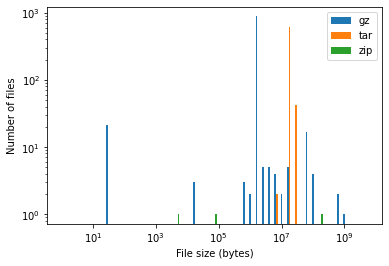

In [64]:
# Split the file size data by extension
gz_data = mdf_crawl_df[mdf_crawl_df.extension == "gz"].size_bytes.values
tar_data = mdf_crawl_df[mdf_crawl_df.extension == "tar"].size_bytes.values
zip_data = mdf_crawl_df[mdf_crawl_df.extension == "zip"].size_bytes.values

# Create bins in logspace
bins = np.logspace(0,np.log10(max(mdf_crawl_df[mdf_crawl_df.label == "compressed"].size_bytes.values)), 50)

# Plot the data
plt.hist([gz_data, tar_data, zip_data], label=["gz", "tar", "zip"], bins=bins)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("File size (bytes)")
plt.ylabel("Number of files")
plt.legend(loc="upper right")

## Exploratory Analysis of CDIAC's Crawl

In [68]:
cdiac_crawl_df = pd.read_csv("/Users/ryan/Documents/CS/abyss/data/cdiac_crawl.csv")

In [69]:
cdiac_crawl_df

,file_path,size_bytes,extension,label,file_uuid
0,/cdiac/cdiac.ornl.gov/pub8old/LDEO_Database_V2...,727336200,csv,decompressed,492ab691_LDEO_Database_V2012.csv
1,/cdiac/cdiac.ornl.gov/pub8old/LDEO_Database_V2...,973244786,csv,decompressed,4ef674a7_LDEO_Database_V2013.csv
2,/cdiac/cdiac.ornl.gov/pub8old/LDEO_Database_V2...,987441985,csv,decompressed,842266b1_LDEO_Database_V2014.csv
3,/cdiac/cdiac.ornl.gov/pub8old/LDEO_Database_V2...,1140057615,csv,decompressed,20a3736e_LDEO_Database_V2015.csv
4,/cdiac/cdiac.ornl.gov/pub8old/Methods for AESO...,72192,doc,decompressed,2a5ac6da_Methods for AESOPS Surface pCO2.doc
...,...,...,...,...,...
36999,/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/Kita...,478048,gif,decompressed,f118f327_SurfaceAlkalinityClimatology_5.gif
37000,/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/Kita...,471895,gif,decompressed,6af2419f_SurfaceAlkalinityClimatology_6.gif
37001,/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/Kita...,472175,gif,decompressed,e09a2887_SurfaceAlkalinityClimatology_7.gif
37002,/cdiac/cdiac.ornl.gov/pub8old/pub8/oceans/Kita...,470874,gif,decompressed,18fb92bf_SurfaceAlkalinityClimatology_8.gif


In [70]:
# Get compressed extensions
compressed_extensions = set(cdiac_crawl_df[cdiac_crawl_df.label == "compressed"].extension)

In [71]:
# Get data on file size of each extension
for extension in compressed_extensions:
    print(f"{extension}: ")
    print(cdiac_crawl_df[cdiac_crawl_df.extension == extension].describe())

zip: 
         size_bytes
count  8.160000e+02
mean   5.724973e+06
std    3.145426e+07
min    3.505000e+03
25%    5.499325e+04
50%    1.718970e+05
75%    4.630382e+05
max    4.524075e+08
tar: 
         size_bytes
count  3.000000e+00
mean   1.212109e+07
std    1.050707e+07
min    5.079040e+06
25%    6.082560e+06
50%    7.086080e+06
75%    1.564211e+07
max    2.419814e+07
gz: 
         size_bytes
count  1.110000e+02
mean   4.677043e+07
std    1.094007e+08
min    4.096000e+03
25%    1.442438e+06
50%    4.516500e+06
75%    2.858644e+07
max    5.968358e+08


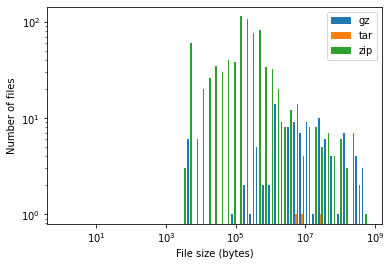

In [73]:
# Split the file size data by extension
gz_data = cdiac_crawl_df[cdiac_crawl_df.extension == "gz"].size_bytes.values
tar_data = cdiac_crawl_df[cdiac_crawl_df.extension == "tar"].size_bytes.values
zip_data = cdiac_crawl_df[cdiac_crawl_df.extension == "zip"].size_bytes.values

# Create bins in logspace
bins = np.logspace(0,np.log10(max(cdiac_crawl_df[cdiac_crawl_df.label == "compressed"].size_bytes.values)), 50)

# Plot the data
plt.hist([gz_data, tar_data, zip_data], label=["gz", "tar", "zip"], bins=bins)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("File size (bytes)")
plt.ylabel("Number of files")
plt.legend(loc="upper right")

In [79]:
mdf_crawl_df.loc[len(mdf_crawl_df.index) - 1]

full_path     /MDF/mdf_connect/prod/data/data_for_motif_extr...
size_bytes                                                  713
extension                                                   xyz
label                                              decompressed
file_uuid                                     0b35bed1_3510.xyz
Name: 2332777, dtype: object